In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("placement.csv", encoding="utf-8-sig")


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.shape

(100, 3)

In [7]:
'''
STEPS I AM GOING TO PERFORM 
    - preprocessing + EDA + Features selection
    - Extract input and output
    - scale the values
    - train test split
    - Evaluate the model/model selection
    - Deploy the model
'''

'\nSTEPS I AM GOING TO PERFORM \n    - preprocessing + EDA + Features selection\n    - Extract input and output\n    - scale the values\n    - train test split\n    - Evaluate the model/model selection\n    - Deploy the model\n'

In [8]:
import matplotlib.pyplot as plt

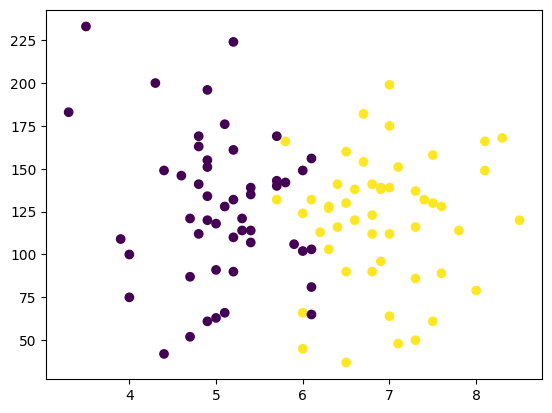

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
x
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)  # 0.1 means 10 percent

In [16]:
x_train

,cgpa,iq
30,7.6,128.0
83,7.5,130.0
41,5.4,114.0
59,4.8,112.0
94,4.7,52.0
...,...,...
6,5.7,143.0
29,7.0,112.0
99,6.2,113.0
97,6.7,182.0


In [17]:
y_train

30    1
83    1
41    0
59    0
94    0
     ..
6     0
29    1
99    1
97    1
39    0
Name: placement, Length: 90, dtype: int64

In [18]:
x_test

,cgpa,iq
89,4.9,151.0
36,5.7,140.0
78,6.1,81.0
70,6.3,127.0
47,5.2,161.0
95,4.3,200.0
72,7.3,116.0
21,7.1,151.0
45,6.0,66.0
98,6.3,103.0


In [19]:
y_test

89    0
36    0
78    0
70    1
47    0
95    0
72    1
21    1
45    1
98    1
Name: placement, dtype: int64

SCALING 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

In [22]:
x_train = scalar.fit_transform(x_train)

In [23]:
x_train

array([[ 1.37762088e+00,  1.27540012e-01],
       [ 1.29157933e+00,  1.77664907e-01],
       [-5.15293306e-01, -2.23334256e-01],
       [-1.03154263e+00, -2.73459152e-01],
       [-1.11758418e+00, -1.77720601e+00],
       [ 8.61371556e-01,  4.03226937e-01],
       [ 1.29157933e+00, -1.55164399e+00],
       [ 7.75330002e-01,  3.78164489e-01],
       [ 6.89288448e-01, -8.24833001e-01],
       [-1.37570884e+00, -2.02783049e+00],
       [-8.59459521e-01, -1.50151909e+00],
       [-1.71127090e-01,  4.78414280e-01],
       [ 1.11949622e+00, -1.82733091e+00],
       [-2.32216594e+00,  1.50597464e+00],
       [ 8.69975711e-02,  8.29288548e-01],
       [ 1.11949622e+00, -9.25082792e-01],
       [ 8.61371556e-01,  1.90697380e+00],
       [ 9.56017265e-04,  2.72902208e-02],
       [-1.71987506e+00, -1.20076972e+00],
       [-9.45501075e-01, -1.55164399e+00],
       [-2.57168644e-01,  1.15510037e+00],
       [ 9.56017265e-04, -1.95264315e+00],
       [-2.15008283e+00,  2.75909702e+00],
       [-1.

In [24]:
x_test = scalar.transform(x_test)

In [25]:
x_test

array([[-9.45501075e-01,  7.03976309e-01],
       [-2.57168644e-01,  4.28289384e-01],
       [ 8.69975711e-02, -1.05039503e+00],
       [ 2.59080679e-01,  1.02477564e-01],
       [-6.87376414e-01,  9.54600786e-01],
       [-1.46175040e+00,  1.93203625e+00],
       [ 1.11949622e+00, -1.73209361e-01],
       [ 9.47413110e-01,  7.03976309e-01],
       [ 9.56017265e-04, -1.42633175e+00],
       [ 2.59080679e-01, -4.99021181e-01]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred = clf.predict(x_test)

In [30]:
y_test

89    0
36    0
78    0
70    1
47    0
95    0
72    1
21    1
45    1
98    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.9

In [33]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

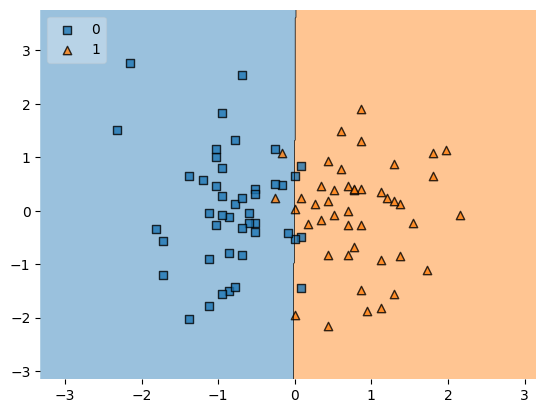

In [34]:
plot_decision_regions(x_train ,y_train.values ,clf=clf, legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf, open('model.pkl','wb'))